<a href="https://colab.research.google.com/github/AmonTonui/Final_Year_Project/blob/main/Iterations_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Install Intrasom
  !pip install minisom

LOCAL_DEV = True
if LOCAL_DEV:
    sys.path.insert(0, '../')
    %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv("educationnormalized_with_winners.csv")


party_colors = {
    'Conservative': (0, 0, 1),    # Blue
    'Labour': (1, 0, 0),          # Red
    'Liberal Democrat': (1, 0.65, 0),  # Orange
    'Green': (0, 0.5, 0),         # Dark Green
    'The Brexit Party': (0.8, 0.4, 0), #light blue

}


#Data with Labels that I will use to map the result clusters
labeling_columns = ['Westminster Parliamentary constituencies', 'Winning Party', 'Winning Vote Share']
features = data.drop(columns=labeling_columns)

#Feature Scaling
# scaler = MinMaxScaler()
# normalized_features = scaler.fit_transform(data[features])

robust_scaler = RobustScaler()
normalized_features = robust_scaler.fit_transform(features)


#Spliting the data in to training, validation and test
train_data, validation_data = train_test_split(normalized_features, test_size=0.3, random_state=42)
# validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)



print(f"Training set: {train_data.shape}")
print(f"Validation set: {validation_data.shape}")
# print(f"Test set: {test_data.shape}")

# normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
# normalized_df[labeling_columns] = data[labeling_columns]

# print(normalized_df.head())

Training set: (373, 6)
Validation set: (160, 6)


 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.4675642316370666
Iteration 500: Train Error = 0.4675642316370666, Validation Error = 0.5132249571495269
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.4683169807669512
Iteration 1000: Train Error = 0.4683169807669512, Validation Error = 0.5189376379744414
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.4675509743834485
Iteration 1500: Train Error = 0.4675509743834485, Validation Error = 0.5243888550883014
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.46804023401973105
Iteration 2000: Train Error = 0.46804023401973105, Validation Error = 0.5248670290808732
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.46705722921695697
Iteration 2500: Train Error = 0.46705722921695697, Validation Error = 0.5262497517738287
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.46727778758530203
Iteration 3000: Train Error = 0.46727778758530203, Validation Error = 0.5186771393877468
 [ 500 / 50

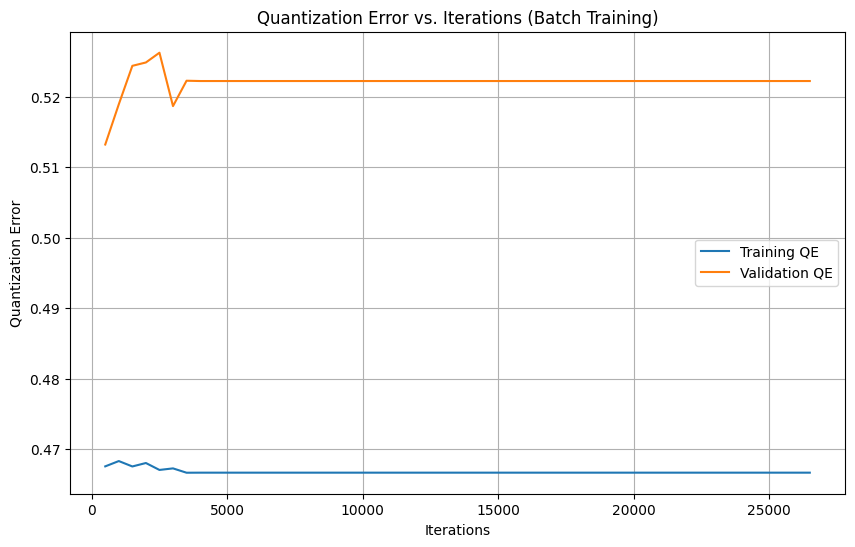

In [24]:
n_neurons = int(np.sqrt(5 * np.sqrt(train_data.shape[0])))
m_neurons = n_neurons

som = MiniSom(n_neurons, m_neurons, train_data.shape[1], sigma=1.5, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=0, topology='rectangular')

som.random_weights_init(train_data)

# Track quantization errors
train_errors = []
validation_errors = []


# Define range of iterations
max_iterations = 26650
batch_size = 500
num_batches = max_iterations // batch_size

for i in range(1, num_batches+1):

  som.train(train_data, num_iteration=batch_size, verbose=True)


  train_error = som.quantization_error(train_data)
  validation_error = som.quantization_error(validation_data)
  train_errors.append(train_error)
  validation_errors.append(validation_error)
  print(f"Iteration {i*batch_size}: Train Error = {train_error}, Validation Error = {validation_error}")



iterations = range(batch_size, max_iterations + 1, batch_size)
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_errors, label='Training QE')
plt.plot(iterations, validation_errors, label='Validation QE')
plt.xlabel('Iterations')
plt.ylabel('Quantization Error')
plt.title('Quantization Error vs. Iterations (Batch Training)')
plt.legend()
plt.grid(True)
plt.show()



